### Read data

In [23]:
import pickle

with open("data.p", "rb") as f:
    faces = pickle.load(f)
    
images = faces.images    
targets = faces.target
target_names = faces.target_names

print(targets.shape)
print(images.shape)
print(images[0].shape)
images[0].shape[0]

(1348,)
(1348, 62, 47)
(62, 47)


62

### Data Visualization

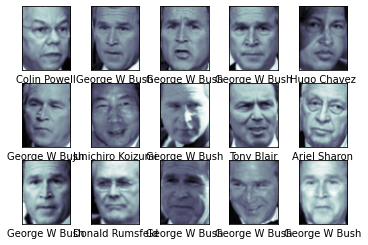

In [24]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=target_names[targets[i]])

# Работа с данными

In [25]:
import numpy as np
import pandas as pd

data = images.reshape(1348, images[0].shape[0]*images[0].shape[1])

df = pd.DataFrame(data)
df['TARGET CLASS'] = targets

In [26]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2905,2906,2907,2908,2909,2910,2911,2912,2913,TARGET CLASS
0,138.000000,135.666672,127.666664,120.666664,117.000000,119.666664,126.000000,133.333328,138.000000,143.666672,...,24.666666,4.666667,2.666667,1.333333,0.333333,1.333333,1.666667,1.666667,0.333333,1
1,71.333336,56.000000,67.666664,91.333336,91.666664,72.333336,101.666664,124.666664,124.333336,127.666664,...,248.333328,252.666672,253.333328,253.000000,253.666672,251.666672,247.666672,243.000000,238.333328,3
2,84.333336,97.333336,72.333336,56.666668,95.333336,118.333336,123.666664,128.666672,130.333328,134.666672,...,91.000000,106.666664,116.000000,123.000000,118.333336,102.000000,114.000000,194.333328,241.000000,3
3,68.333336,81.666664,121.666664,135.000000,138.666672,141.333328,142.000000,148.333328,159.666672,171.000000,...,104.000000,165.000000,224.000000,232.333328,228.666672,230.000000,229.333328,224.333328,206.666672,3
4,56.666668,55.333332,47.333332,47.000000,50.000000,44.666668,44.666668,52.000000,62.333332,55.000000,...,39.666668,37.333332,34.333332,34.000000,34.333332,34.333332,34.666668,35.666668,34.000000,5


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df.drop('TARGET CLASS', axis=1)
scaler.fit(features)
scaled_features = scaler.transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

In [28]:
scaled_features.head()

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,1.005024,0.914363,0.629284,0.281905,-0.039304,-0.205499,-0.261081,-0.250794,-0.268406,-0.230477,...,0.070462,-1.452803,-1.750167,-1.757778,-1.745720,-1.680403,-1.576026,-1.491004,-1.406577,-1.333812
1,-0.419313,-0.826985,-0.714991,-0.390338,-0.634512,-1.350612,-0.884615,-0.485209,-0.649182,-0.685094,...,2.189565,2.110955,1.924292,1.760819,1.684242,1.677604,1.663666,1.656761,1.675792,1.675089
2,-0.141567,0.076476,-0.610436,-1.184807,-0.548363,-0.237756,-0.320872,-0.377017,-0.482012,-0.486199,...,-0.437894,-0.395891,-0.238897,-0.166923,-0.087527,-0.116279,-0.273247,-0.053610,1.054209,1.708802
3,-0.483408,-0.265965,0.494856,0.610388,0.469756,0.318672,0.148913,0.154923,0.335263,0.546160,...,-0.323657,-0.188757,0.625391,1.349068,1.402576,1.346221,1.383267,1.422171,1.437376,1.274745
4,-0.732667,-0.841557,-1.170551,-1.406342,-1.613473,-2.019938,-2.345221,-2.450683,-2.376605,-2.749813,...,-1.151878,-1.213802,-1.266165,-1.313275,-1.300507,-1.229723,-1.148956,-1.068743,-0.972320,-0.908183


In [29]:
from sklearn.model_selection import train_test_split

X = scaled_features
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# KNN 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Оценка качества

In [31]:
pred = knn.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))

[[ 9  3  0  2  0  0  0  0]
 [ 1 25  4  4  1  1  0  3]
 [ 1  4  6  5  2  4  0  2]
 [ 2  5  6 75  2  5  1 14]
 [ 0  3  0  5  6  2  0  9]
 [ 0  1  0  7  0  6  0  0]
 [ 0  1  0  4  0  3  6  0]
 [ 1  1  0 13  2  1  0 12]]


C:\Users\annaj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


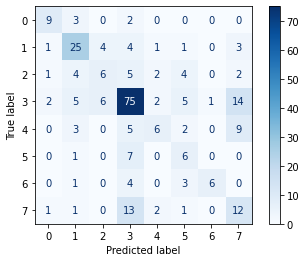

In [33]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.58      0.64      0.61        39
           2       0.38      0.25      0.30        24
           3       0.65      0.68      0.67       110
           4       0.46      0.24      0.32        25
           5       0.27      0.43      0.33        14
           6       0.86      0.43      0.57        14
           7       0.30      0.40      0.34        30

    accuracy                           0.54       270
   macro avg       0.52      0.46      0.47       270
weighted avg       0.55      0.54      0.53       270



In [35]:
from sklearn.model_selection import GridSearchCV

def grid_search(clf, X_train, y_train, param_grid, cv=5 ):
    
    grid_clf = GridSearchCV(clf(), param_grid, cv=cv, n_jobs=-1)
    grid_clf.fit(X_train, y_train)
    return grid_clf.best_estimator_

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_param_grid = { 
        'n_neighbors': [1, 5, 10, 15],
        'weights' : ['uniform', 'distance' ],
}
knn = grid_search(KNeighborsClassifier, X_train, y_train, knn_param_grid)
knn


KNeighborsClassifier(weights='distance')

In [37]:
def results(model):
    pred = model.predict(X_test)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))

In [38]:
results(knn)

[[ 7  3  0  3  0  1  0  0]
 [ 0 28  1  6  1  1  0  2]
 [ 1  5  5 12  0  0  0  1]
 [ 2  5  1 87  1  5  1  8]
 [ 0  2  0 10  4  0  1  8]
 [ 0  1  0  7  0  6  0  0]
 [ 0  2  0  4  0  3  5  0]
 [ 0  2  1 14  1  0  0 12]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.58      0.72      0.64        39
           2       0.62      0.21      0.31        24
           3       0.61      0.79      0.69       110
           4       0.57      0.16      0.25        25
           5       0.38      0.43      0.40        14
           6       0.71      0.36      0.48        14
           7       0.39      0.40      0.39        30

    accuracy                           0.57       270
   macro avg       0.57      0.45      0.47       270
weighted avg       0.58      0.57      0.54       270



C:\Users\annaj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


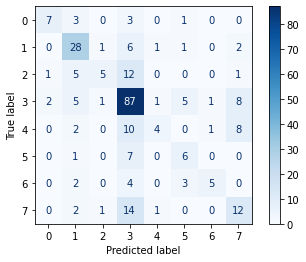

In [40]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

In [50]:
res_model = KNeighborsClassifier(weights='distance')
res_model.fit(X_train, y_train)
results(res_model)

[[ 7  3  0  3  0  1  0  0]
 [ 0 28  1  6  1  1  0  2]
 [ 1  5  5 12  0  0  0  1]
 [ 2  5  1 87  1  5  1  8]
 [ 0  2  0 10  4  0  1  8]
 [ 0  1  0  7  0  6  0  0]
 [ 0  2  0  4  0  3  5  0]
 [ 0  2  1 14  1  0  0 12]]
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.58      0.72      0.64        39
           2       0.62      0.21      0.31        24
           3       0.61      0.79      0.69       110
           4       0.57      0.16      0.25        25
           5       0.38      0.43      0.40        14
           6       0.71      0.36      0.48        14
           7       0.39      0.40      0.39        30

    accuracy                           0.57       270
   macro avg       0.57      0.45      0.47       270
weighted avg       0.58      0.57      0.54       270



# SVM

In [41]:
from sklearn.svm import SVC 
model = SVC()
model.fit(X_train, y_train)

SVC()

In [42]:
results(model)

[[ 10   0   0   4   0   0   0   0]
 [  0  32   0   7   0   0   0   0]
 [  0   3  11   9   1   0   0   0]
 [  0   3   1 106   0   0   0   0]
 [  0   2   0   8  13   1   0   1]
 [  0   0   0   9   1   4   0   0]
 [  0   0   0   4   1   1   7   1]
 [  0   1   0  14   0   0   0  15]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.78      0.82      0.80        39
           2       0.92      0.46      0.61        24
           3       0.66      0.96      0.78       110
           4       0.81      0.52      0.63        25
           5       0.67      0.29      0.40        14
           6       1.00      0.50      0.67        14
           7       0.88      0.50      0.64        30

    accuracy                           0.73       270
   macro avg       0.84      0.60      0.67       270
weighted avg       0.77      0.73      0.72       270



In [43]:
from sklearn.svm import SVC 

svm_param_grid = { 
        'C' : [0.5, 1, 5],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    }

model = grid_search(SVC, X_train, y_train, svm_param_grid)
model


SVC(C=0.5, kernel='linear')

In [44]:
results(model)

[[13  1  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0]
 [ 1  1 18  1  2  1  0  0]
 [ 3  6  2 97  0  0  0  2]
 [ 0  1  0  1 23  0  0  0]
 [ 0  1  0  0  3  9  1  0]
 [ 1  0  0  1  2  0  9  1]
 [ 1  1  0  2  0  0  0 26]]
              precision    recall  f1-score   support

           0       0.68      0.93      0.79        14
           1       0.78      1.00      0.88        39
           2       0.90      0.75      0.82        24
           3       0.95      0.88      0.92       110
           4       0.77      0.92      0.84        25
           5       0.90      0.64      0.75        14
           6       0.90      0.64      0.75        14
           7       0.90      0.87      0.88        30

    accuracy                           0.87       270
   macro avg       0.85      0.83      0.83       270
weighted avg       0.88      0.87      0.87       270



In [51]:
res_model = SVC(C=0.5, kernel='linear')
res_model.fit(X_train, y_train)
results(res_model)

[[13  1  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0]
 [ 1  1 18  1  2  1  0  0]
 [ 3  6  2 97  0  0  0  2]
 [ 0  1  0  1 23  0  0  0]
 [ 0  1  0  0  3  9  1  0]
 [ 1  0  0  1  2  0  9  1]
 [ 1  1  0  2  0  0  0 26]]
              precision    recall  f1-score   support

           0       0.68      0.93      0.79        14
           1       0.78      1.00      0.88        39
           2       0.90      0.75      0.82        24
           3       0.95      0.88      0.92       110
           4       0.77      0.92      0.84        25
           5       0.90      0.64      0.75        14
           6       0.90      0.64      0.75        14
           7       0.90      0.87      0.88        30

    accuracy                           0.87       270
   macro avg       0.85      0.83      0.83       270
weighted avg       0.88      0.87      0.87       270



# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf1_param_grid = { 
        'n_estimators': [200, 500],
        'max_depth' : [4, 5, 6, 7, 8],
    }

random_forest = grid_search(RandomForestClassifier, X_train, y_train, rf1_param_grid)
random_forest

RandomForestClassifier(max_depth=8, n_estimators=200)

In [46]:
results(random_forest)

[[  3   6   0   5   0   0   0   0]
 [  0  29   0   9   0   0   0   1]
 [  0   5   3  16   0   0   0   0]
 [  0   4   0 106   0   0   0   0]
 [  0   2   1  16   5   1   0   0]
 [  0   1   0   5   0   8   0   0]
 [  0   0   0  11   0   1   2   0]
 [  0   2   0  18   1   0   0   9]]
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       0.59      0.74      0.66        39
           2       0.75      0.12      0.21        24
           3       0.57      0.96      0.72       110
           4       0.83      0.20      0.32        25
           5       0.80      0.57      0.67        14
           6       1.00      0.14      0.25        14
           7       0.90      0.30      0.45        30

    accuracy                           0.61       270
   macro avg       0.81      0.41      0.45       270
weighted avg       0.71      0.61      0.55       270



In [47]:
rf_param_grid = { 
        'n_estimators': [500, 1000, 2000],
        'max_depth' : [8, 9, 10],
    }

random_forest = grid_search(RandomForestClassifier, X_train, y_train, rf_param_grid)
random_forest

RandomForestClassifier(max_depth=10, n_estimators=1000)

In [48]:
results(random_forest)

[[  3   7   0   4   0   0   0   0]
 [  0  28   0  11   0   0   0   0]
 [  0   5   4  15   0   0   0   0]
 [  0   5   0 105   0   0   0   0]
 [  0   1   1  15   7   1   0   0]
 [  0   1   0   7   0   6   0   0]
 [  0   0   0  10   1   1   2   0]
 [  0   1   0  21   1   0   0   7]]
              precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       0.58      0.72      0.64        39
           2       0.80      0.17      0.28        24
           3       0.56      0.95      0.70       110
           4       0.78      0.28      0.41        25
           5       0.75      0.43      0.55        14
           6       1.00      0.14      0.25        14
           7       1.00      0.23      0.38        30

    accuracy                           0.60       270
   macro avg       0.81      0.39      0.45       270
weighted avg       0.71      0.60      0.54       270



C:\Users\annaj\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


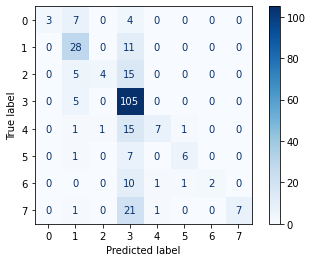

In [49]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(random_forest, X_test, y_test, cmap=plt.cm.Blues)

In [52]:
res_model = RandomForestClassifier(max_depth=10, n_estimators=1000)
res_model.fit(X_train, y_train)
results(res_model)

[[  2   7   0   5   0   0   0   0]
 [  0  29   0  10   0   0   0   0]
 [  0   3   5  16   0   0   0   0]
 [  0   4   0 106   0   0   0   0]
 [  0   1   1  16   6   1   0   0]
 [  0   0   0   6   1   7   0   0]
 [  0   0   0  11   0   1   2   0]
 [  0   1   0  20   1   0   0   8]]
              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.64      0.74      0.69        39
           2       0.83      0.21      0.33        24
           3       0.56      0.96      0.71       110
           4       0.75      0.24      0.36        25
           5       0.78      0.50      0.61        14
           6       1.00      0.14      0.25        14
           7       1.00      0.27      0.42        30

    accuracy                           0.61       270
   macro avg       0.82      0.40      0.45       270
weighted avg       0.72      0.61      0.56       270



# Upsampling

In [53]:
train = pd.concat([X_train, y_train], axis=1)

In [54]:
train['TARGET CLASS'].value_counts()

3    420
1    197
7    114
2     97
4     84
0     63
5     57
6     46
Name: TARGET CLASS, dtype: int64

In [58]:
from sklearn.utils import resample

new_classes=[]
for i in range(8):
    if i != 3:
        new_classes.append(resample(train[train['TARGET CLASS']==i],replace=True, n_samples=420))
    
minority_classes = pd.concat(new_classes)
upsample = pd.concat([train[train['TARGET CLASS'] == 3], minority_classes])

In [59]:
X_train_2 = upsample.drop(['TARGET CLASS'],axis=1)
y_train_2 = upsample['TARGET CLASS']

In [60]:
upsample['TARGET CLASS'].value_counts()

3    420
0    420
1    420
2    420
4    420
5    420
6    420
7    420
Name: TARGET CLASS, dtype: int64

# After Upsampling

In [32]:
knn_1 = grid_search(KNeighborsClassifier, X_train_2, y_train_2, knn_param_grid)
results(knn_1)


[[ 16  11   3   8   1   1   0   3]
 [ 10  69  11  13   0   4   1  10]
 [  2   6  22  14   2   4   0   2]
 [  6  13  14 187   8  11   3  24]
 [  2   3   4  15   8   2   2  17]
 [  1   5   0   6   5  18   0   3]
 [  0   4   1   4   1   5  14   2]
 [  2   6   5  22   4   1   2  31]]
              precision    recall  f1-score   support

           0       0.41      0.37      0.39        43
           1       0.59      0.58      0.59       118
           2       0.37      0.42      0.39        52
           3       0.70      0.70      0.70       266
           4       0.28      0.15      0.20        53
           5       0.39      0.47      0.43        38
           6       0.64      0.45      0.53        31
           7       0.34      0.42      0.38        73

    accuracy                           0.54       674
   macro avg       0.46      0.45      0.45       674
weighted avg       0.54      0.54      0.54       674



In [33]:
knn_1

KNeighborsClassifier(n_neighbors=1)

Было Точность: 0.57 Модель: KNeighborsClassifier(weights='distance')
Стало Точность: 0.55 Модель: KNeighborsClassifier(n_neighbors=1)

In [34]:
model_1 = svm_grid_search(X_train_2, y_train_2)
results(model_1)

[[ 31   4   6   1   1   0   0   0]
 [  7  96   3   6   0   0   0   6]
 [  2   1  40   6   2   1   0   0]
 [  1  12   6 238   2   0   0   7]
 [  1   0   1   4  45   0   0   2]
 [  0   1   0   1   5  28   1   2]
 [  1   0   0   2   2   0  25   1]
 [  0   2   3   5   2   0   0  61]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        43
           1       0.83      0.81      0.82       118
           2       0.68      0.77      0.72        52
           3       0.90      0.89      0.90       266
           4       0.76      0.85      0.80        53
           5       0.97      0.74      0.84        38
           6       0.96      0.81      0.88        31
           7       0.77      0.84      0.80        73

    accuracy                           0.84       674
   macro avg       0.82      0.80      0.81       674
weighted avg       0.84      0.84      0.84       674



In [35]:
model_1

SVC(kernel='linear')

Было Точность: 0.87 Модель: SVC(C=0.5, kernel='linear')
Стало Точность: 0.79 Модель: SVC()

In [37]:
random_forest_1 = random_forest_grid_search(X_train_2, y_train_2,  [500, 2000], [8, 10])
results(random_forest_1)


[[ 16  13   2  12   0   0   0   0]
 [  3  80   4  28   0   1   1   1]
 [  0   7  22  23   0   0   0   0]
 [  0  10   2 252   0   1   1   0]
 [  0   0   1  23  20   5   0   4]
 [  1   0   0   5   3  29   0   0]
 [  0   0   0  10   3   2  16   0]
 [  0   3   0  40   2   0   0  28]]
              precision    recall  f1-score   support

           0       0.80      0.37      0.51        43
           1       0.71      0.68      0.69       118
           2       0.71      0.42      0.53        52
           3       0.64      0.95      0.76       266
           4       0.71      0.38      0.49        53
           5       0.76      0.76      0.76        38
           6       0.89      0.52      0.65        31
           7       0.85      0.38      0.53        73

    accuracy                           0.69       674
   macro avg       0.76      0.56      0.62       674
weighted avg       0.71      0.69      0.67       674



In [38]:
random_forest_1

RandomForestClassifier(max_depth=10, n_estimators=2000)

Было Точность: 0.61 Модель: RandomForestClassifier(max_depth=10, n_estimators=1000) 
Стало Точность: 0.69 Модель: RandomForestClassifier(max_depth=10, n_estimators=2000)